1. Data Collection
Use datasets like LIAR, FakeNewsNet, or Kaggle’s Fake News Dataset
Scrape news articles from websites (ensure legality and ethical considerations)

2. Data Preprocessing
Remove stopwords, punctuation, and special characters
Tokenize and normalize text (e.g., lemmatization)
Convert text to lowercase for consistency
                         
3. Feature Engineering
TF-IDF (Term Frequency-Inverse Document Frequency)
Word embeddings (Word2Vec, GloVe, BERT)
N-grams to capture contextual relationships
Metadata features like source credibility, publication date

4. Model Selection
Traditional Machine Learning Models: Logistic Regression, Random Forest, Naïve Bayes
Deep Learning Models: LSTMs, Bi-LSTMs, Transformers (BERT, RoBERTa)

5. Training & Evaluation
Use a train-test split (e.g., 80-20)
Metrics: Accuracy, Precision, Recall, F1-score
Handle class imbalance (oversampling/undersampling, weighted loss functions)

6. Deployment
Convert model into an API using Flask/FastAPI
Deploy using Gradio/Streamlit for user interaction
Host on AWS, Heroku, or GCP

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import torch
import torch.nn  as nn
nltk.download('stopwords')
nltk.download('punkt')

C:\Users\rt\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


nltk.download('stopwords')

Downloads a list of common words (like "the," "is," "and") that are often removed (i.e., "stopped") during text processing to improve the efficiency of NLP models.
nltk.download('punkt')

Downloads the Punkt tokenizer, which helps split text into sentences and words.

In [3]:
df = pd.read_csv("FakeNewsNet.csv")
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
df.shape  #to get the number of rows sand cols of the dataset

(23196, 5)

In [5]:
df.isna().sum()   # to sum of the valumes that have empty values in each column

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [6]:
# Since the columns sum of empty columns are not much the i will just drop them
df = df.dropna()
df.shape

(22866, 5)

In [7]:
# I want t know the ratio of fake news to real news to see the if there's balnace
print("Distribution in percentage")
print(f"{df['real'].value_counts() * 100 / df.shape[0]}")

Distribution in percentage
real
1    75.968687
0    24.031313
Name: count, dtype: float64


In [17]:
df['text'] = df['title'] + " " +  df['news_url'] + " " + df['source_domain']

df.head()

,title,news_url,source_domain,tweet_num,real,text
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,Kandi Burruss Explodes Over Rape Accusation on...
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,People's Choice Awards 2018: The best red carp...
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,Sophia Bush Sends Sweet Birthday Message to 'O...
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,Colombian singer Maluma sparks rumours of inap...
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,Gossip Girl 10 Years Later: How Upper East Sid...


# Data Preprocessing 
Remove stopwords, punctuation, and special characters Tokenize and normalize text (e.g., lemmatization) Convert text to lowercase for consistency

What Does It Mean to Normalize Text in NLP?
Text normalization is the process of converting text into a standardized and consistent format to improve the performance of Natural Language Processing (NLP) models. It reduces variations in text that may have the same meaning but appear differently.

Key Steps in Text Normalization

1️ Lowercasing

Converts all text to lowercase to avoid treating "Apple" and "apple" as different words.

Example: "The QUICK Brown Fox" → "the quick brown fox"

2️ Removing Punctuation & Special Characters

Eliminates symbols like .,!?; as they don’t contribute much to meaning in most NLP tasks.
Example: "Hello, world!!" → "Hello world"

3️ Tokenization

Breaks text into individual words (tokens).
Example: "I love NLP!" → ["I", "love", "NLP"]

4️ Stopword Removal
Removes common words like "the", "is", "and" that don’t add much meaning.
Example: "the cat is on the table" → "cat table"

5️ Stemming (Optional)
Reduces words to their root form by chopping off endings.
Example: "running", "runs", "ran" → "run"

6️ Lemmatization (Optional)
Converts words to their base dictionary form (more accurate than stemming).
Example:
"better" → "good"
"running" → "run"

7 Removing Numbers
Numbers may not be useful in some NLP tasks.
Example: "I have 3 apples" → "I have apples"

8️ Removing URLs & Email Addresses
Cleans unnecessary links or emails.
Example: "Visit https://example.com" → "Visit"

Why Normalize Text?
 Makes text consistent
Reduces dimensionality (fewer unique words → better performance)
Improves accuracy of NLP models
Helps models understand context better

In [20]:
import string
from nltk.tokenize import word_tokenize
# Stopwords are removed because they don’t add much meaning in text analysis. e.g is, an, a, or etc.
stop_words = set(stopwords.words('english'))

# This function applies preprocess_text() to each row in a Pandas Series.
def preprocess_series(series):
    return series.apply(preprocess_text)


'''Removes punctuation → "Hello, World!" → "Hello World"
Converts to lowercase → "HELLO" → "hello"
Tokenizes text → "hello world" → ["hello", "world"]
Removes stopwords → "this is a test" → "test"
Removes non-alphabetic tokens → "100% real" → "real"
Joins tokens back into a single string'''
def preprocess_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation)) #removes punctuation from text
    text = text.lower()  # converts to lower text
    tokens = word_tokenize(text) #tokenize text i.e make each word an element in list
    tokens = [word for word in tokens if word.lower() not in stop_words] # remove stopwords from token
    tokens = [word for word in tokens if word.isalpha()] #keep only alpahabets in the token
    preprocessed_txt = ' '.join(tokens) #join tokens back to string

    return preprocessed_txt

In [22]:
df['Clean text'] = preprocess_series(df['text'])
df[['text','Clean text' ]].head()

,text,Clean text
0,Kandi Burruss Explodes Over Rape Accusation on...,kandi burruss explodes rape accusation real ho...
1,People's Choice Awards 2018: The best red carp...,peoples choice awards best red carpet looks ww...
2,Sophia Bush Sends Sweet Birthday Message to 'O...,sophia bush sends sweet birthday message one t...
3,Colombian singer Maluma sparks rumours of inap...,colombian singer maluma sparks rumours inappro...
4,Gossip Girl 10 Years Later: How Upper East Sid...,gossip girl years later upper east siders shoc...


# Feature Engineering 
TF-IDF (Term Frequency-Inverse Document Frequency) Word embeddings (Word2Vec, GloVe, BERT) N-grams to capture contextual relationships Metadata features like source credibility, publication date

1️ Word2Vec (Word Embeddings)
🔹 What It Does:
Converts words into dense numerical vectors based on their meaning.
Words with similar meanings have similar vector representations.
Helps models understand word relationships instead of treating words as isolated tokens.
🔹 How It Works:
CBOW (Continuous Bag of Words): Predicts a word based on surrounding words.
Skip-Gram: Predicts surrounding words given a central word.
🔹 Example:
Words like "king", "queen", and "prince" will have vectors that are closer in space.
 vector("king") - vector("man") + vector("woman") ≈ vector("queen")

🔹 Use Cases:
 Sentiment Analysis
 Text Classification
 Similarity Detection

2️ BERT (Bidirectional Encoder Representations from Transformers)
🔹 What It Does:
A deep learning-based NLP model that understands context better than Word2Vec.
Unlike Word2Vec (which treats words in isolation), BERT considers the entire sentence bidirectionally (left & right).
Helps in understanding polysemy (words with multiple meanings based on context).
🔹 How It Works:
Uses transformers (self-attention mechanism) to analyze the entire sentence structure.
Fine-tuned on specific NLP tasks for higher accuracy.
🔹 Example:
Sentence: "He went to the bank to withdraw money."

BERT understands "bank" means financial institution (not a riverbank).
Sentence: "The boat is docked at the bank of the river."

Here, BERT understands "bank" as a riverbank.
🔹 Use Cases:
 Machine Translation
 Chatbots & Virtual Assistants
 Fake News Detection
 Question Answering (e.g., ChatGPT)

3️ N-grams (Text Representation)
🔹 What It Does:
N-grams are sequences of N words used to capture phrase-based meaning.
Helps statistical models understand the structure of language.
🔹 Types of N-grams:
Unigram (1-gram): "I love NLP" → ["I", "love", "NLP"]
Bigram (2-gram): "I love NLP" → ["I love", "love NLP"]
Trigram (3-gram): "I love NLP" → ["I love NLP"]
🔹 Use Cases:
 Text Prediction (e.g., autocomplete)
 Speech Recognition
 Spam Detection

In [25]:
from numpy import triu
from gensim.models import Word2Vec
import gensim
from scipy.linalg import triu
''' df['preprocessed_text']

This accesses the column preprocessed_text in the DataFrame df.
This column contains text data that has already been cleaned (e.g., removing punctuation, stopwords, etc.).
2️⃣ .apply(lambda x: x.split())

.apply() applies a function to each row in the column.
lambda x: x.split() is a lambda function (an anonymous function) that:
Takes x, which is a single text entry (a string).
Splits it into a list of words (tokens), breaking at spaces.'''
word2vec_model = Word2Vec(df['Clean text'].apply(lambda x: x.split()),
                                                vector_size=100, min_count=1, window=5)
# Retrieves the vocabulary size (number of unique words learned by Word2Vec).
vocab_size = len(word2vec_model.wv)
vocab_size


26715

In [28]:
# from transformers import BertTokenizer, BertModel
# bert_model = BertTokenizer()


In [30]:
import tensorflow as tf
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

In [31]:
tokenizer = Tokenizer(num_words=vocab_size) # limits the vocabulary size to the vocab_size most frequent words.

tokenizer.fit_on_texts(df['Clean text']) #It assigns an index to each word based on its frequency.

df['tokenized text'] = tokenizer.texts_to_sequences(df['Clean text'])

df[['text', 'Clean text', 'tokenized text']].head()

,text,Clean text,tokenized text
0,Kandi Burruss Explodes Over Rape Accusation on...,kandi burruss explodes rape accusation real ho...,"[4637, 5211, 3830, 989, 5212, 76, 229, 960, 18..."
1,People's Choice Awards 2018: The best red carp...,peoples choice awards best red carpet looks ww...,"[853, 255, 15, 26, 78, 109, 161, 120]"
2,Sophia Bush Sends Sweet Birthday Message to 'O...,sophia bush sends sweet birthday message one t...,"[1525, 1067, 1711, 337, 64, 489, 99, 2841, 125..."
3,Colombian singer Maluma sparks rumours of inap...,colombian singer maluma sparks rumours inappro...,"[7078, 414, 3831, 1227, 1297, 2842, 68, 3832, 4]"
4,Gossip Girl 10 Years Later: How Upper East Sid...,gossip girl years later upper east siders shoc...,"[787, 203, 66, 1650, 1950, 1951, 11878, 1952, ..."


In [32]:
from keras.preprocessing.sequence import pad_sequences
# Find Maximum Sequence Length
maxlen = df['tokenized text'].apply(len).max()
print(maxlen)

# Pad All Tokenized Sequences
pad_text = pad_sequences(df['tokenized text'], maxlen=maxlen)

# Convert padded text into a DataFrame Column
# np.split(padded_text, padded_text.shape[0]) Converts padded_text into a list of individual arrays.
df['pad_text'] = np.split(pad_text, pad_text.shape[0])

#Extracts each row's array and stores it as a list.
df['pad_text'] = df['pad_text'].apply(lambda x: x[0])

36


In [33]:
df[['tokenized text', 'pad_text']].head()

,tokenized text,pad_text
0,"[4637, 5211, 3830, 989, 5212, 76, 229, 960, 18...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[853, 255, 15, 26, 78, 109, 161, 120]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1525, 1067, 1711, 337, 64, 489, 99, 2841, 125...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[7078, 414, 3831, 1227, 1297, 2842, 68, 3832, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[787, 203, 66, 1650, 1950, 1951, 11878, 1952, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [38]:
'''Creates a zero matrix of shape (vocab_size, embedding_dim).
Each row represents a word in the vocabulary.
vector_size (100 in your case) determines the dimensionality of each word vector.
✅ Why?
To store the actual Word2Vec embeddings while keeping a placeholder (zero vector) for unknown words.'''
embedding_matrix = np.zeros((vocab_size, word2vec_model.vector_size))
embedding_matrix[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [40]:
'''Iterates through each word in the tokenizer’s vocabulary.
Checks if i >= tokenizer.num_words, which ensures that only words within the vocabulary size limit are considered.
✅ Why?
This avoids indexing errors and ensures that only frequently used words (within num_words limit) are processed.'''

'''Retrieves the Word2Vec embedding vector for each word.
If the vector exists, it is stored in embedding_matrix[i].
✅ Why?
This allows us to use pre-trained Word2Vec embeddings instead of training them from scratch'''

for word, i in tokenizer.word_index.items():
    if i >= tokenizer.num_words:
        continue
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [43]:
from sklearn.model_selection import train_test_split as tts

train, test = tts(df[['pad_text', 'real']], test_size=0.2, random_state=42)
print(train.shape, test.shape)

(18292, 2) (4574, 2)


In [45]:
''' PyTorch models (e.g., LSTMs, Transformers) require tensor inputs, not NumPy arrays.
🔹 Tensors support automatic differentiation for training deep learning models.
🔹 Tensors can be moved to GPU (.cuda()) for faster computations.'''
embedded_matrix_tensor = torch.Tensor(embedding_matrix)
embedded_matrix_tensor

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-8.6835e-01,  1.4027e+00,  4.7915e-01,  ..., -1.4054e+00,
          3.6001e-01,  3.2632e-01],
        [-5.7036e-01,  1.0241e+00,  5.9774e-01,  ..., -9.3299e-01,
          1.4980e-01, -1.3280e-02],
        ...,
        [ 2.3476e-03, -2.4478e-03,  8.8939e-05,  ..., -2.9073e-03,
          3.3379e-03,  6.4751e-03],
        [ 3.8950e-03,  3.8323e-03,  2.9956e-04,  ...,  1.4935e-03,
         -6.8046e-03, -6.2878e-03],
        [-1.9330e-03,  1.3118e-03, -7.9460e-03,  ..., -1.9730e-03,
         -4.7502e-04,  2.8888e-03]])

In [47]:
import torch.optim as optim
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding = nn.Embedding.from_pretrained(embedded_matrix_tensor)
        self.embedding.requires_grad=False
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, text):
        embedded = self.dropout(self.embedding(text).float())
        output, (hidden, _) = self.lstm(embedded)
        hidden = self.dropout(hidden[-1,:,:])
        return self.fc(hidden.squeeze(0))

In [49]:
import random
SEED = 42
random.seed(SEED)

BATCH_SIZE = 30
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
INPUT_DIM = vocab_size
EMBEDDING_DIM = word2vec_model.vector_size
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
DROPOUT = 0.5
model = LSTMModel(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)
model 

LSTMModel(
  (embedding): Embedding(26715, 100)
  (lstm): LSTM(100, 256, num_layers=2, dropout=0.5)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [52]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [53]:
def train(model, df, x_col, y_col, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    all_predictions = []
    all_labels = []

    x_batches = create_batch_iterator(df, BATCH_SIZE, x_col)
    y_batches = create_batch_iterator(df, BATCH_SIZE, y_col)

    iterations = 0

    for batch_text, batch_label in zip(x_batches, y_batches):
        batch_text = torch.Tensor(batch_text).to(device).long().T
        batch_label = torch.Tensor(batch_label).to(device).long()
        # print(batch_text.shape, batch_label.shape)
        
        optimizer.zero_grad()
        predictions = model(batch_text).squeeze(1)
        # print(predictions.shape, batch_label.shape)
        loss = criterion(predictions.float(), batch_label.float())
        acc = binary_accuracy(predictions, batch_label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        all_predictions += predictions.tolist()
        all_labels += batch_label.tolist()
        iterations += 1
    
    all_predictions = torch.tensor(all_predictions)
    all_labels = torch.tensor(all_labels)
    val_acc = binary_accuracy(all_predictions, all_labels)
    val_loss = criterion(all_predictions.float(), all_labels.float()).item()

    return epoch_loss / iterations, epoch_acc / iterations, val_loss, val_acc.item()


In [54]:
def split_by_batchsize(arr, batch_size):
    return np.array_split(arr, (arr.shape[0]/batch_size)+1)
    
def create_batch_iterator(iter_df, batch_size, col):
    x = split_by_batchsize(df[col].to_numpy(), batch_size)
    n_batches = len(x)
    
    def iterator():
        for i in range(n_batches):
            yield np.array([*x[i]])
        return

    return iterator()

next(create_batch_iterator(df, BATCH_SIZE, 'pad_text'))

array([[    0,     0,     0, ...,   189,    32,   632],
       [    0,     0,     0, ...,   109,   161,   120],
       [    0,     0,     0, ...,  4639, 11877,    11],
       ...,
       [    0,     0,     0, ...,  5217,  5218,   824],
       [    0,     0,     0, ...,  1530,   234,     7],
       [    0,     0,     0, ...,   687,  2393,     1]])

In [59]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, df, x_col, y_col):
    all_predictions = []
    all_labels = []

    x_batches = create_batch_iterator(df, BATCH_SIZE, x_col)
    y_batches = create_batch_iterator(df, BATCH_SIZE, y_col)

    for batch_text, batch_label in zip(x_batches, y_batches):
        batch_text = torch.Tensor(batch_text).to(device).long().T
        batch_label = torch.Tensor(batch_label).to(device).long()
        
        predictions = model(batch_text).squeeze(1)
        all_predictions += predictions.tolist()
        all_labels += batch_label.tolist()

    all_predictions = torch.tensor(all_predictions)
    all_labels = torch.tensor(all_labels)
    y_pred_binary = torch.round(torch.sigmoid(all_predictions)).cpu().numpy()
    y_true = all_labels.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, all_predictions.cpu().numpy())

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

    fpr, tpr, _ = roc_curve(y_true, all_predictions.cpu().numpy())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Accuracy: 0.5595644187877198
F1 Score: 0.6786842357145136
ROC AUC Score: 0.5006714568102664


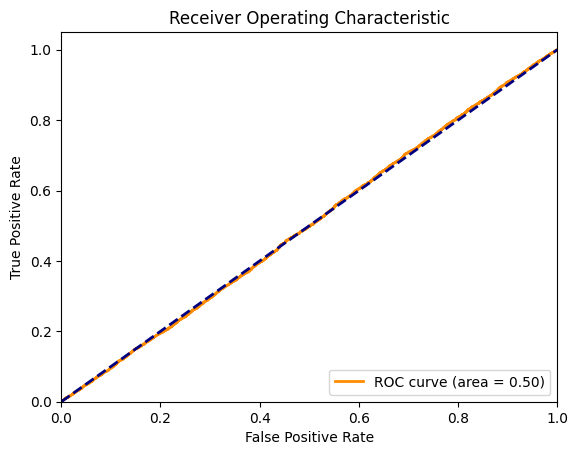

In [61]:
evaluate_model(model, test, 'pad_text', 'real')

In [89]:
import pickle

# Example: Save a sample dictionary (replace with your model)
model = {"name": "Sample Fake news Model", "version": 1}

with open("model.txt", "wb") as file:
    pickle.dump(model, file)

In [91]:
with open("model.txt", "rb") as file:
    loaded_model = pickle.load(file)
print(loaded_model)

{'name': 'Sample Fake news Model', 'version': 1}


In [67]:
from flask import Flask, request, jsonify
import torch
import numpy as np
import joblib  # For loading the model

# Load the trained model
model = joblib.load("model.pkl")  # Replace with your model file

app = Flask(__name__)

@app.route("/", methods=["GET"])
def home():
    return "Fake News Prediction API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    text = data.get("text", "")

    if not text:
        return jsonify({"error": "No input text provided"}), 400

    # Preprocess input (modify as needed)
    processed_text = text.lower()

    # Convert input to tensor (example)
    input_tensor = torch.tensor(np.array([len(processed_text.split())]))

    # Make a prediction
    prediction = model.predict([processed_text])  # Modify based on model type

    return jsonify({"prediction": int(prediction[0])})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\rt\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [93]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Create and fit a vectorizer
vectorizer = TfidfVectorizer()
# sample_data = ["This is an example text", "Machine learning is powerful"]
# vectorizer.fit(sample_data)

# Save it
with open("vectorizer.txt", "wb") as file:
    pickle.dump(vectorizer, file)

In [95]:
with open("vectorizer.txt", "rb") as file:
    loaded_vectorizer = pickle.load(file)
print("Vectorizer loaded successfully!")

Vectorizer loaded successfully!


In [97]:
import gradio as gr
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the model and vectorizer
model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

def predict_fake_news(text):
    # Preprocess the input text
    processed_text = text.lower()
    
    # Vectorize the input text
    vectorized_text = vectorizer.transform([processed_text])
    
    # Make a prediction
    prediction = model.predict(vectorized_text)
    
    # Return the result
    return "Fake News" if prediction[0] == 1 else "Real News"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_fake_news,
    inputs=gr.Textbox(label="Enter News Text"),
    outputs=gr.Label(label="Prediction"),
    title="Fake News Detector",
    description="Enter a news headline or content to check if it's real or fake."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
